### Some Visulization on supplier 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\supplier_risk_scores.csv")

In [3]:
df.head()

,Supplier_ID,Supplier_Name,Avg_Risk_Prob,Max_Risk_Prob,ESG_Risk_Score,GPR_Index,Transactions,Supplier_Risk_Flag
0,S0001,SUPP_I_001,0.474375,0.885,23.35,32.430000,24,0
1,S0002,SUPP_BM_002,0.404167,0.990,33.40,22.431667,36,0
2,S0003,SUPP_I_003,0.312188,0.795,23.35,23.596250,16,0
3,S0004,SUPP_I_004,0.519375,0.930,23.35,30.532500,24,1
4,S0005,SUPP_E_005,0.875857,1.000,43.95,27.270000,35,1


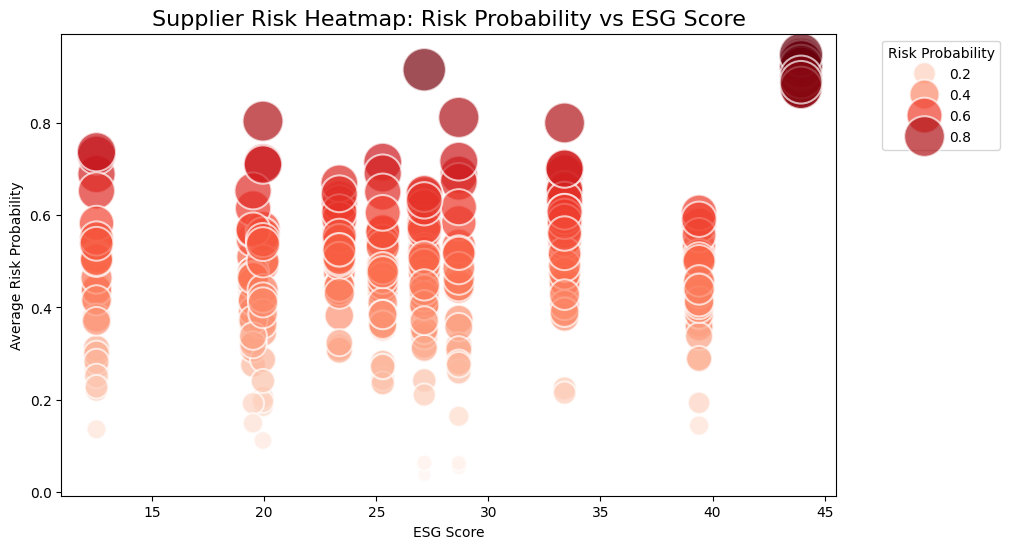

In [4]:
# Heatmap_style scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,
                x='ESG_Risk_Score',
                y='Avg_Risk_Prob',
                size='Avg_Risk_Prob',
                hue='Avg_Risk_Prob',
                palette='Reds',
                sizes=(100,1000),
                alpha=0.7
                )

plt.title('Supplier Risk Heatmap: Risk Probability vs ESG Score', fontsize=16)
plt.xlabel('ESG Score')
plt.ylabel('Average Risk Probability')
plt.legend(title='Risk Probability', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_25232\53485114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


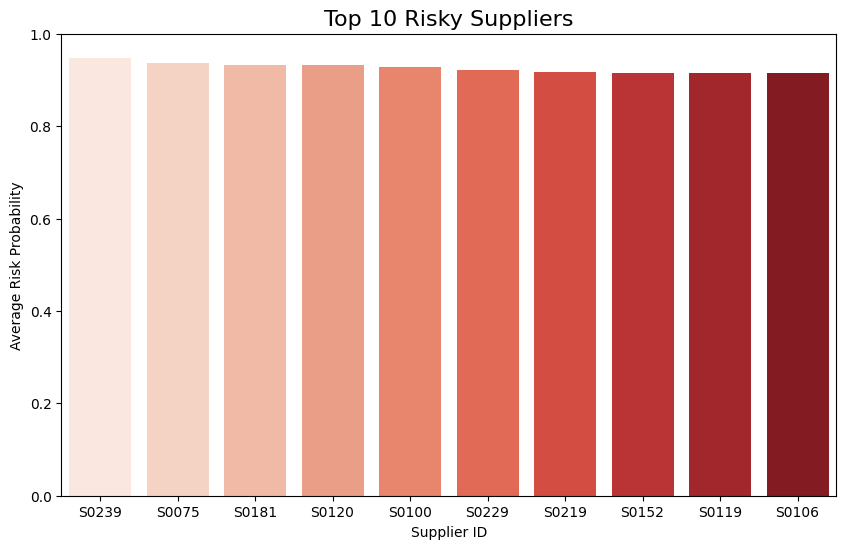

In [7]:
# Sort suppliers by risk descending
top10_risky = df.sort_values('Avg_Risk_Prob', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_risky,
    x='Supplier_ID',
    y='Avg_Risk_Prob',
    palette='Reds'
)

plt.title('Top 10 Risky Suppliers', fontsize=16)
plt.xlabel('Supplier ID')
plt.ylabel('Average Risk Probability')
plt.ylim(0,1)  # Risk probability between 0 and 1
plt.show()


In [17]:
df.shape

(300, 8)

In [20]:
# final file for powerBI visulization

predictions = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\supplier_risk_scores.csv")
supplier_info = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\Merged_data.csv")

final_df = predictions.merge(
    supplier_info,
    on='Supplier_ID',
    how='left'
)

final_df.columns.tolist()

['Supplier_ID',
 'Supplier_Name_x',
 'Avg_Risk_Prob',
 'Max_Risk_Prob',
 'ESG_Risk_Score',
 'GPR_Index_x',
 'Transactions',
 'Supplier_Risk_Flag',
 'Unnamed: 0',
 'Unnamed: 0.1_x',
 'Unnamed: 0_x',
 'Date',
 'Supplier_Name_y',
 'Sector',
 'SKU',
 'Product_Type',
 'Price',
 'Availability',
 'Availability_Pct',
 'Number_of_products_sold',
 'Revenue_generated',
 'Customer_demographics',
 'Stock_levels',
 'Lead_times',
 'Order_quantities',
 'Shipping_times',
 'Shipping_carriers',
 'Shipping_costs',
 'Location',
 'Manufacturing_lead_time',
 'Production_volumes',
 'Manufacturing_costs',
 'Inspection_results',
 'Defect_rates_pct',
 'Transportation_modes',
 'Routes',
 'Delivery_Reliabiliy',
 'OnTime_Flag',
 'Cost_per_unit',
 'Revenue_per_unit',
 'Stockout_Risk',
 'Inspection_failure_flag',
 'Profit_margin',
 'Unnamed: 0.1_y',
 'Unnamed: 0_y',
 'Symbol',
 'Name',
 'Industry',
 'Full Time Employees',
 'Total ESG Risk score',
 'Environment Risk Score',
 'Governance Risk Score',
 'Social Risk Scor

In [21]:
final_df.shape

(12585, 61)

In [25]:
final_df.drop(columns=['Supplier_Name_y', 'SKU', 'Product_Type', 'Price', 'Availability',
'Availability_Pct', 'Number_of_products_sold', 'Customer_demographics', 
'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times', 
'Shipping_carriers', 'Shipping_costs', 'Location', 'Manufacturing_lead_time', 
'Production_volumes', 'Manufacturing_costs', 'Inspection_results', 'Defect_rates_pct', 
'Transportation_modes', 'Routes', 'Delivery_Reliabiliy', 'OnTime_Flag', 'Cost_per_unit', 
'Revenue_per_unit', 'Stockout_Risk', 'Inspection_failure_flag', 'Profit_margin',
'Unnamed: 0', 'Unnamed: 0.1_x', 'Unnamed: 0_x', 'Unnamed: 0.1_y', 'Unnamed: 0_y', 
'Symbol', 'Name', 'Industry', 'Full Time Employees', 'Total ESG Risk score', 
'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score', 
'Controversy Level', 'Controversy Score', 'ESG Risk Percentile', 'ESG Risk Level', 
'E_S_Avg', 'Governance_Impact', 'ESG_Risk_Level_Encoded', 'GPR_Index_y'
],inplace=True)

In [26]:
final_df.to_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\PowerBI.csv")

In [27]:
final_df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Supplier_ID', 'Supplier_Name_x', 'Avg_Risk_Prob', 'Max_Risk_Prob',
       'ESG_Risk_Score', 'GPR_Index_x', 'Transactions', 'Supplier_Risk_Flag',
       'Date', 'Sector', 'Revenue_generated'],
      dtype='object')>

In [28]:
final_df['Supplier_Risk_Flag'].value_counts()

Supplier_Risk_Flag
0    7367
1    5218
Name: count, dtype: int64